# Dynamics of Disease Transmission and Human Behavior Project - Time Series Analysis



## 1. Goal

* Research question: how well can be predict the number of COVID-19 cases one day in advance or one week in advance?
* Math question: given the historical series of COVID-19 cases, what is the best estimator of the cases one day ahead or one week ahead? What is the test-sample mean squared error (MSE) of each estimate?



## 2. Dataset

The dataset contains confirmed COVID-19 cases for 50 states. The COVID-19 cases are reported on the John Hopkins platform. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
california = pd.read_csv("./drive/MyDrive/CS109 Project/state_level_data/California.csv",parse_dates=['date'],index_col=['date'])
new_york = pd.read_csv("./drive/MyDrive/CS109 Project/state_level_data/New York.csv",parse_dates=['date'],index_col=['date'])
ma = pd.read_csv("./drive/MyDrive/CS109 Project/state_level_data/Massachusetts.csv",parse_dates=['date'],index_col=['date'])

In [4]:
california.head()

,JHU_cases,JHU_deaths,JHU_hospitalizations,up2date,gt_after covid vaccine,gt_side effects of vaccine,gt_effects of covid vaccine,gt_covid,gt_how long does covid last,gt_anosmia,...,neighbor_South Dakota,neighbor_Tennessee,neighbor_Texas,neighbor_Utah,neighbor_Vermont,neighbor_Virginia,neighbor_Washington,neighbor_West Virginia,neighbor_Wisconsin,neighbor_Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,108.406849,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
california.tail()

,JHU_cases,JHU_deaths,JHU_hospitalizations,up2date,gt_after covid vaccine,gt_side effects of vaccine,gt_effects of covid vaccine,gt_covid,gt_how long does covid last,gt_anosmia,...,neighbor_South Dakota,neighbor_Tennessee,neighbor_Texas,neighbor_Utah,neighbor_Vermont,neighbor_Virginia,neighbor_Washington,neighbor_West Virginia,neighbor_Wisconsin,neighbor_Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2022-01-09,NaN,NaN,NaN,NaN,1036.271881,79.980083,0.000000,191709.747309,880.874506,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-10,NaN,NaN,NaN,NaN,501.666380,359.532743,215.179826,222023.793840,719.959308,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-11,NaN,NaN,NaN,NaN,737.261085,221.918779,73.787815,224041.563172,1185.038030,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-12,NaN,NaN,NaN,NaN,978.821343,151.092032,150.713937,204037.539213,453.839532,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-13,NaN,NaN,NaN,NaN,984.362561,75.973690,0.000000,189624.711109,1141.021922,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# remove final 5 days because it does not make sense to have zero cases
california = california.iloc[:-5, :]

In [7]:
california.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 739 entries, 2020-01-01 to 2022-01-08
Columns: 498 entries, JHU_cases to neighbor_Wyoming
dtypes: float64(498)
memory usage: 2.8 MB


In [8]:
california.describe()

,JHU_cases,JHU_deaths,JHU_hospitalizations,up2date,gt_after covid vaccine,gt_side effects of vaccine,gt_effects of covid vaccine,gt_covid,gt_how long does covid last,gt_anosmia,...,neighbor_South Dakota,neighbor_Tennessee,neighbor_Texas,neighbor_Utah,neighbor_Vermont,neighbor_Virginia,neighbor_Washington,neighbor_West Virginia,neighbor_Wisconsin,neighbor_Wyoming
count,718.000000,718.000000,544.000000,416.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,...,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,8408.796657,107.302228,654.398897,266.588302,1031.942497,267.194675,185.924657,90028.915062,261.722963,29.050446,...,263.803621,2037.598886,6963.263231,949.910864,106.435933,1700.607242,1296.756267,495.643454,1651.902507,166.931755
std,12651.020881,138.156802,557.909209,194.928115,1390.723867,345.901801,257.298072,48033.048924,261.124650,55.944590,...,377.790566,3500.653803,9728.762811,1276.364174,238.298140,2672.792276,2221.208234,696.125703,2286.520080,248.876616
min,-3935.000000,-364.000000,116.000000,0.305869,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-4.000000,-42.000000,0.000000,0.000000,-1.000000,-232.000000,-39.000000,-4.000000,0.000000,-8.000000
25%,1808.000000,25.000000,321.000000,148.166794,0.000000,0.000000,0.000000,59592.925370,85.080935,0.000000,...,8.000000,80.250000,1405.250000,164.000000,4.000000,338.500000,179.000000,37.250000,170.000000,4.000000
50%,4261.500000,71.000000,432.500000,218.744994,452.973872,106.062503,76.018212,85254.949587,202.678864,0.000000,...,103.000000,1138.500000,4353.500000,469.500000,28.500000,985.000000,662.000000,245.000000,722.500000,59.000000
75%,9263.500000,126.000000,767.250000,372.607233,1545.638911,433.671560,303.376619,119532.223229,343.857587,74.962550,...,391.750000,2448.250000,9097.250000,1342.250000,133.000000,1947.500000,1644.750000,800.500000,2457.750000,214.000000
max,133669.000000,1174.000000,2580.000000,1038.286656,7638.661166,2015.938064,1288.312759,279350.860227,1762.854735,489.629451,...,3047.000000,41464.000000,162871.000000,14754.000000,2779.000000,40246.000000,33069.000000,9164.000000,16956.000000,1541.000000


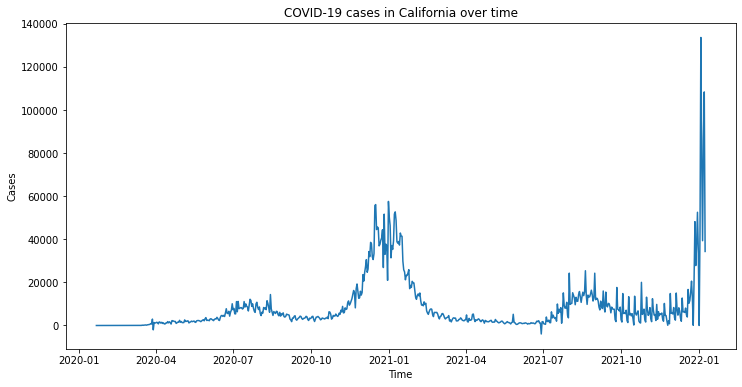

In [9]:
fig,ax = plt.subplots(1,1, figsize = (12,6))
plt.plot(california.index.values, california['JHU_cases'])
plt.xlabel('Time')
plt.ylabel('Cases')
plt.title('COVID-19 cases in California over time')
plt.show()

## 3. Data Cleaning

We observed that most of NAs are at the beginning of the padamic, so we believe the number of cases are 0 or close to 0. Therefore, we decided to replace nan with 0 in cases. We also flipped the sign of the negative number of cases, because they are likely to be erroneous data.

In [10]:
california['JHU_cases'] = california['JHU_cases'].fillna(0)

In [11]:
california['JHU_cases'][california['JHU_cases'] <0]

date
2020-03-29   -2019.0
2021-06-29   -3935.0
Name: JHU_cases, dtype: float64

In [12]:
california['JHU_cases'][california['JHU_cases'] == -2019.0] = 2019.0
california['JHU_cases'][california['JHU_cases'] == -3935.0] = 3935.0

In [13]:
california['JHU_cases'][california['JHU_cases'] <0]

Series([], Name: JHU_cases, dtype: float64)

## 4. Data Transformation

Since the variance is not constant overtime, it violates one of the assumptions of stationarity. We can corrrect it by rolling average or a log transformation of the data.

In [14]:
# Applying rolling average
window = 5
california['JHU_cases'] = california['JHU_cases'].transform(lambda x: x.rolling(window).mean())

In [15]:
california['JHU_cases'] = california['JHU_cases'].fillna(0)

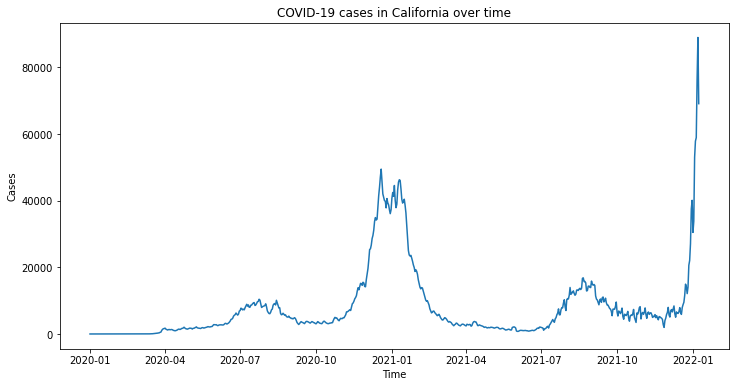

In [16]:
fig,ax = plt.subplots(1,1, figsize = (12,6))
plt.plot(california.index.values, california['JHU_cases'])
plt.xlabel('Time')
plt.ylabel('Cases')
plt.title('COVID-19 cases in California over time')
plt.show()

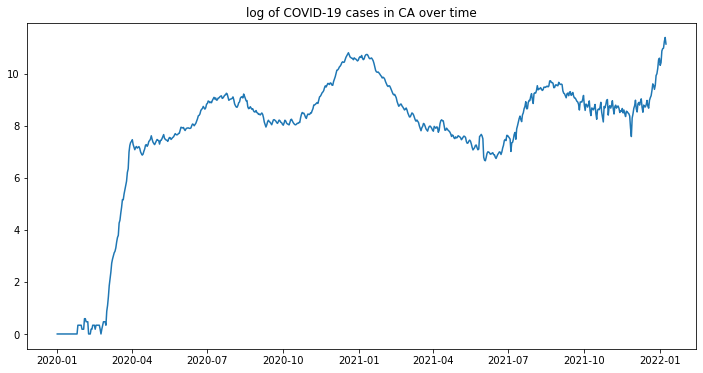

In [17]:
# Applying log transformation
fig,ax = plt.subplots(1,1, figsize = (12,6))
log_cases = np.log(california['JHU_cases']+1)
plt.plot(california.index.values, log_cases)
plt.title("log of COVID-19 cases in CA over time")
plt.show()

In [18]:
any(california.index.isna())

False

In [19]:
any(log_cases.isna())

False


### Information Criteria

Idea: find a balance between model fit and complexity. 

AIC (Akaike Information Criteria): $-2 * \text{log-likelihood} + 2k$ 

BIC (Bayesian Information Criteria): $-2 * \text{log-likelihood} + k \log(n)$ 

where $k$ is the model complexity (degrees of freedom used up) and $n$ is the number of elements. 

We aim to select a model that minimizes both of these criteria; when they disagree, turn to another approach like out-of-sample validation. 

In [20]:
# Define functions to calculate AIC and BIC
from scipy.stats import norm 

def evaluate_AIC(k, residuals):
  """
  Finds the AIC given the number of parameters estimated and 
  the residuals of the model. Assumes residuals are distributed 
  Gaussian with unknown variance. 
  """
  standard_deviation = np.std(residuals)
  log_likelihood = norm.logpdf(residuals, 0, scale=standard_deviation)
  return 2 * k - 2 * np.sum(log_likelihood)

def evaluate_BIC(k, residuals):
  """
  Finds the AIC given the number of parameters estimated and 
  the residuals of the model. Assumes residuals are distributed 
  Gaussian with unknown variance. 
  """
  standard_deviation = np.std(residuals)
  log_likelihood = norm.logpdf(residuals, 0, scale=standard_deviation)
  return k * np.log(len(residuals)) - 2 * np.sum(log_likelihood)

## 5. Models





### Linear Model

[0.00702823]
MSE with linear fit: 4.548069813129548
AIC: 3218.556614436924
BIC: 3223.161912357872


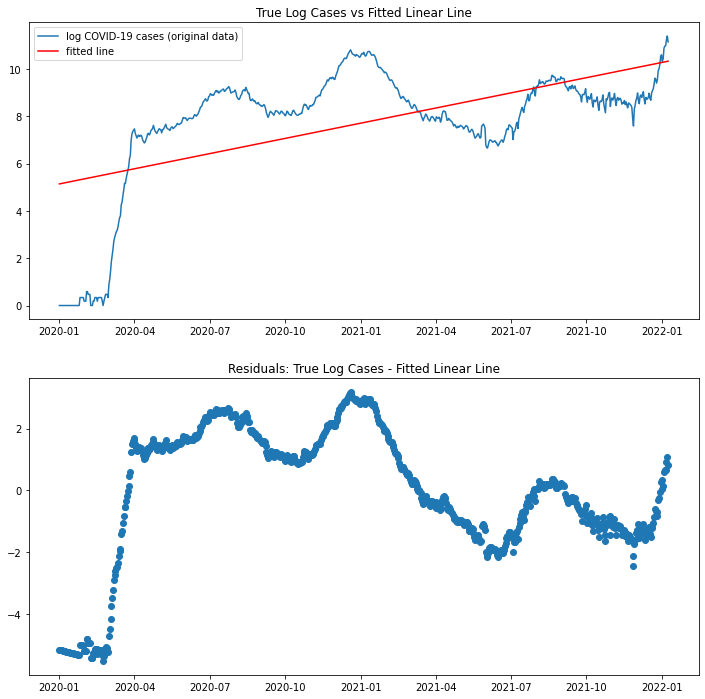

In [21]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
index_len = len(california.index.values)
index = np.linspace(1,index_len,index_len).reshape(-1,1)
# index = california.index.values.astype('datetime64[D]').reshape(-1,1)

clf.fit(index, log_cases)
print(clf.coef_) 
linear_prediction = clf.predict(index)

fig, axs = plt.subplots(2,1, figsize = (12,12))
axs[0].plot(california.index.values, log_cases, label='log COVID-19 cases (original data)')
axs[0].plot(california.index.values, linear_prediction, 'r', label='fitted line')
axs[0].legend()
axs[0].set_title("True Log Cases vs Fitted Linear Line")
linear_residuals = log_cases - linear_prediction
axs[1].plot(california.index.values, linear_residuals, 'o')
axs[1].set_title("Residuals: True Log Cases - Fitted Linear Line")

print("MSE with linear fit:", np.mean((linear_residuals)**2))
print("AIC:", evaluate_AIC(1, linear_residuals))
print("BIC:", evaluate_BIC(1, linear_residuals))

### Higher Order Model

[ 8.76760836e-02 -2.21421396e-04  1.68901696e-07]
MSE with cubic fit: 0.979912988137383
AIC: 2086.195734408407
BIC: 2095.4063302503037


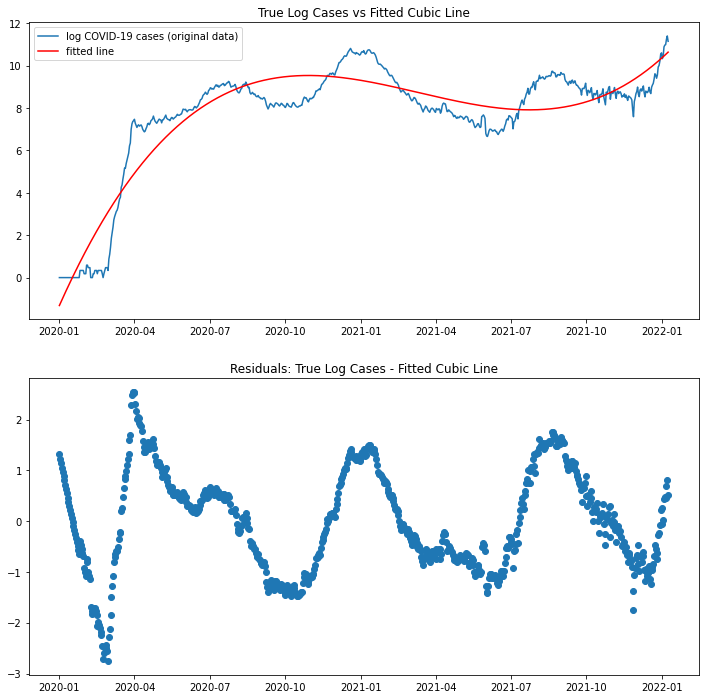

In [22]:
# After linear fit, it seems like a higher order model is needed
from sklearn import linear_model
clf = linear_model.LinearRegression()
index_len = len(california.index.values)
index = np.linspace(1,index_len,index_len).reshape(-1,1)

new_x = np.hstack((index, index ** 2, index ** 3))
clf.fit(new_x, log_cases)
print(clf.coef_) 
cubic_prediction = clf.predict(new_x)

fig, axs = plt.subplots(2,1, figsize=(12,12))
axs[0].plot(california.index.values, log_cases, label='log COVID-19 cases (original data)')
axs[0].plot(california.index.values, cubic_prediction, 'r', label='fitted line')
axs[0].legend()
axs[0].set_title("True Log Cases vs Fitted Cubic Line")
cubic_residuals = log_cases - cubic_prediction
axs[1].plot(california.index.values, cubic_residuals, 'o')
axs[1].set_title("Residuals: True Log Cases - Fitted Cubic Line")
print("MSE with cubic fit:", np.mean((cubic_residuals)**2))
print("AIC:", evaluate_AIC(2, cubic_residuals))
print("BIC:", evaluate_BIC(2, cubic_residuals))

## 6. Examine ACF/PACF

Let's look at the ACF/PACF of the residuals after removing the cubic trend. This tells us about existence of periodic components, or autoregressive or moving average trends that we need to account for. 

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


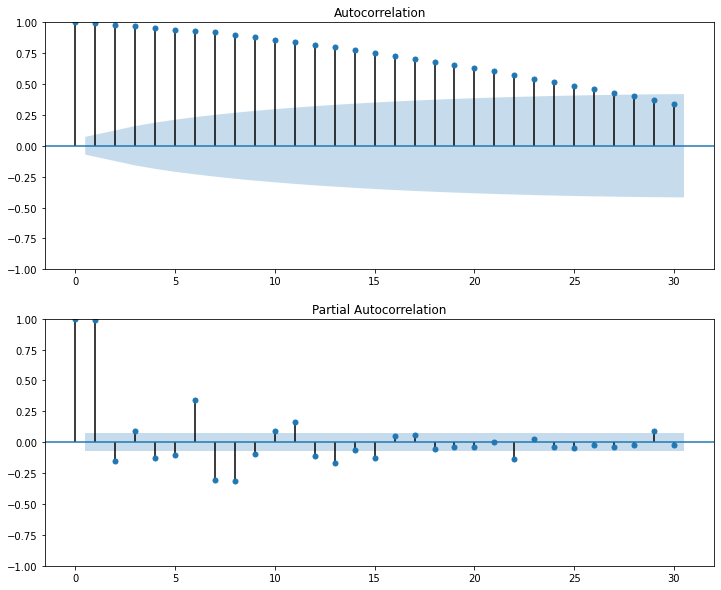

In [23]:
import statsmodels.api as sm
fig, axs = plt.subplots(2,1, figsize = (12,10))
sm.graphics.tsa.plot_acf(cubic_residuals, lags=30, ax = axs[0])
sm.graphics.tsa.plot_pacf(cubic_residuals, lags=30, ax = axs[1])
plt.show()

After taking a rolling average, taking a log transformation of the data, and removing a cubic trend, there's a pattern in the ACF/PACF plots. Strong first two terms in PACF, exponentially decaying ACF. This pattern is an evidence of an AR(1) component. It is important to model these components in order to forecase the cases in the future.

## 7. ARIMA Models

There are open source tools we can use to estimate AR/MA terms. Here, we use the ARIMA package to fit models to the data. 

Estimation goal: given an order $p, q$, find estimates of $\phi$ and $\theta$

The general form for an AR model of order $p$:
$$X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} \dots + \phi_p X_{t - p} + \varepsilon_t$$

And the form for an MA model of order $q$:
$$X_t = \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} \dots + \theta_q \varepsilon_{t-1}$$

where $ɛ_t$ is mean zero white noise that's uncorrelated with any lagged or future values. 

In [24]:
from statsmodels.tsa.arima.model import ARIMA

def grid_search_ARIMA(data, AR_range, MA_range, verbose=False):
  min_aic = np.inf 
  min_bic = np.inf
  min_aic_index = None
  min_bic_index = None 
  aic_matrix = np.zeros((len(AR_range), len(MA_range)))
  bic_matrix = np.zeros((len(AR_range), len(MA_range)))
  for AR_order in AR_range:
    for MA_order in MA_range:
      arma = ARIMA(data, order=(AR_order, 0, MA_order)).fit()
      aic_matrix[AR_order, MA_order] = arma.aic
      bic_matrix[AR_order, MA_order] = arma.bic
      if arma.aic < min_aic:
        min_aic = arma.aic
        min_aic_index = (AR_order, 0, MA_order)
      if arma.bic < min_bic:
        min_bic = arma.bic
        min_bic_index = (AR_order, 0, MA_order)
  if verbose:
    print("Minimizing AIC order: ", min_aic_index)
    print("Minimizing BIC order: ", min_bic_index )
    print("matrix of AIC", aic_matrix)
    print("Matrix of BIC", bic_matrix)
  return min_aic_index, min_bic_index, aic_matrix, bic_matrix

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, f

Minimizing AIC order:  (3, 0, 3)
Minimizing BIC order:  (3, 0, 3)
matrix of AIC [[ 2086.19573446  1200.47398402   400.58363291    99.47049583]
 [ -906.1707104   -924.25498269  -924.83575415  -922.93914841]
 [ -920.8804206   -924.20595393  -922.75457547  -976.81167508]
 [ -923.54108234  -923.93826044 -1007.53084605 -1015.08967408]]
Matrix of BIC [[2095.40633031 1214.28987778  419.00482459  122.49698544]
 [-892.35481663 -905.833791   -901.80926455 -895.30736089]
 [-902.45922891 -901.17946432 -895.12278795 -944.57458964]
 [-900.51459273 -896.30647291 -975.2937606  -978.24729071]]


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:              JHU_cases   No. Observations:                  739
Model:                 ARIMA(3, 0, 3)   Log Likelihood                 484.519
Date:                Sun, 28 Aug 2022   AIC                           -953.038
Time:                        00:32:03   BIC                           -916.196
Sample:                    01-01-2020   HQIC                          -938.832
                         - 01-08-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5413      4.684      1.610      0.107      -1.639      16.722
ar.L1          0.0437      0.026      1.660      0.097      -0.008       0.095
ar.L2          0.0949      0.026      3.669      0.0

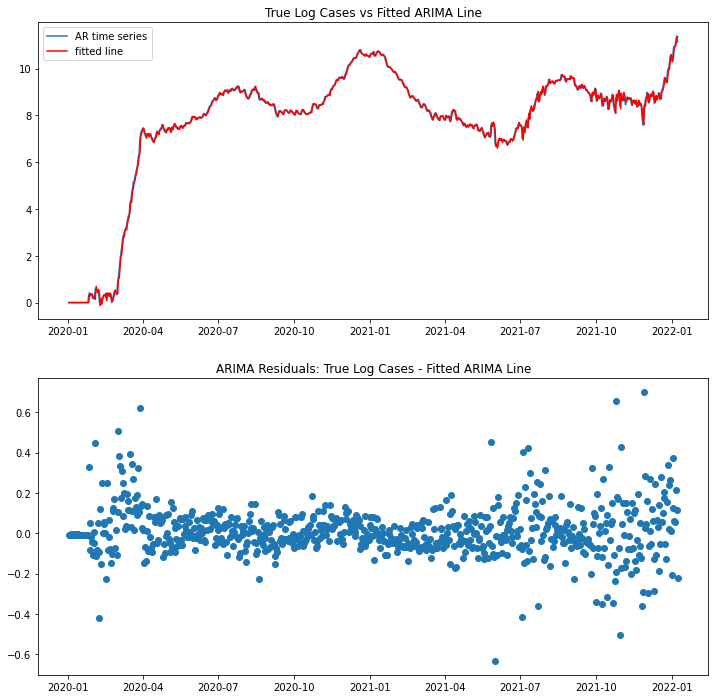

Automatic selection finds model with AR 3, MA 3
MSE with selected model: 0.015533991793349505


In [25]:
min_aic_index, min_bic_index, _, _ = grid_search_ARIMA(cubic_residuals, range(4), range(4), verbose=True)
if min_aic_index == min_bic_index:
  arma = ARIMA(log_cases, order=min_bic_index).fit()
  print(arma.summary())
  arma_predictions = arma.predict()
  arma_residuals = log_cases - arma_predictions
  arma_residuals = arma_residuals[1:] # Fitting AR 1 model means removing one observation
  
  fig, axs = plt.subplots(2,1, figsize=(12,12))
  axs[0].plot(log_cases[1:], label='AR time series')
  axs[0].plot(arma_predictions[1:], 'r', label='fitted line')
  axs[0].set_title("True Log Cases vs Fitted ARIMA Line")
  axs[0].legend()
  axs[1].plot(arma_residuals, 'o')
  axs[1].set_title("ARIMA Residuals: True Log Cases - Fitted ARIMA Line")
  plt.show()
  print("Automatic selection finds model with AR {0}, MA {2}".format(*min_aic_index))
  print("MSE with selected model:", np.mean(arma_residuals**2))
else:
  print("AIC, BIC do not agree.")

AIC and BIC agree with each other on the order of AR and MA which is 3.

### Aside: What if AIC/BIC don't agree? 

One solution is to use a more complicated tool to assess model fit, such as cross validation with a rolling forecast window. 

## 8. One Day Forecasting

Now that we found a model, we can form forecasts. 

With estimates of each $\theta$ and $\phi$ term, we can predict one step ahead. 

$$\hat{X}_{t + 1} = \hat{\phi}_1 X_{t} + \hat{\phi}_2 X_{t-1} \dots + \hat{\phi}_p X_{t - p + 1} + \hat{\theta}_1 \varepsilon_{t} + \hat{\theta}_2 \varepsilon_{t-1} \dots + \hat{\theta}_q \varepsilon_{t-q + 1} $$

To form long-range forecasts, we can just plug in our estimate $\hat{X}_{t + 1}$ in place of $X_{t + 1}$ at every future value, and so on for other future estimates.



We set 20% of the series as the test set. In practice, we would likely use rolling windows to assess the performance more credibly, since 20% of the series can actually be much further than the model predicts. Basically, we predict on a window and train on everything in the past.

An illustration of rolling windows: for $t = 1, \dots, 100$, train a model on steps $t = 1, \dots, 20$, then predict on $t = 21, \dots, 40$. Then train the model on $t = 1, \dots, 40$ and predict on $t = 41, \dots, 60$, and so on.

In [26]:
train_test_split = int(len(log_cases) * 0.8)
train_price, test_price = cubic_residuals[:train_test_split], cubic_residuals[train_test_split:]
train_date, test_date = california.index.values[:train_test_split], california.index.values[train_test_split:]
assert(len(train_date) + len(test_date) == len(california.index.values))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zero

                               SARIMAX Results                                
Dep. Variable:              JHU_cases   No. Observations:                  591
Model:                 ARIMA(3, 0, 3)   Log Likelihood                 515.526
Date:                Sun, 28 Aug 2022   AIC                          -1015.052
Time:                        00:32:06   BIC                           -979.998
Sample:                    01-01-2020   HQIC                         -1001.397
                         - 08-13-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4289      0.880      0.487      0.626      -1.296       2.154
ar.L1         -0.2198      0.148     -1.487      0.137      -0.510       0.070
ar.L2          0.7551      0.039     19.201      0.0

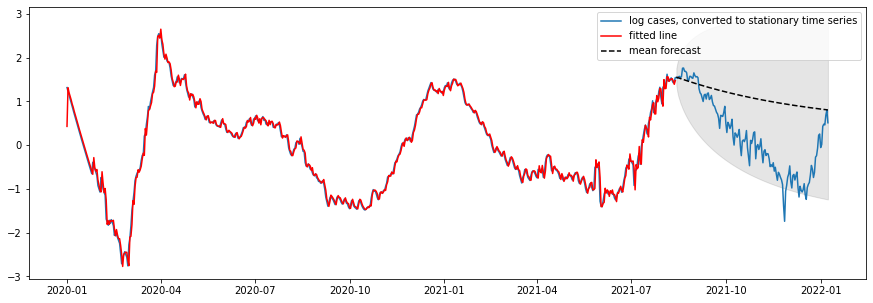

In [27]:
## First, let's see how this does with the AIC selected values. 
arma = ARIMA(train_price, order=min_aic_index).fit()
print(arma.summary())
fig, ax = plt.subplots(figsize=(15, 5))

# Construct the forecasts
fcast = arma.get_forecast(len(test_price)).summary_frame()

arma_predictions = arma.predict()
ax.plot(california.index.values, cubic_residuals, label='log cases, converted to stationary time series')
predicted_values = arma_predictions
ax.plot(train_date, predicted_values, 'r', label='fitted line')
forecast_means = fcast['mean'].values.reshape(-1,1)
test_set_mse = np.mean((forecast_means.reshape(test_price.shape) - test_price)**2)
ax.plot(test_date, forecast_means, 'k--', label='mean forecast')
ax.fill_between(test_date.flatten(), fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1);
plt.legend()
print("Test set mean squared error: ", test_set_mse)

In previous ACF and PACF plots, it seems that the AR order is 1. Let's try to use AR(1) and MA(3) model and compare the two models by MSE.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              JHU_cases   No. Observations:                  591
Model:                 ARIMA(1, 0, 3)   Log Likelihood                 491.103
Date:                Sun, 28 Aug 2022   AIC                           -970.206
Time:                        00:32:07   BIC                           -943.915
Sample:                    01-01-2020   HQIC                          -959.964
                         - 08-13-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3036      0.586      0.518      0.605      -0.846       1.453
ar.L1          0.9887      0.006    162.221      0.000       0.977       1.001
ma.L1          0.2304      0.037      6.297      0.0

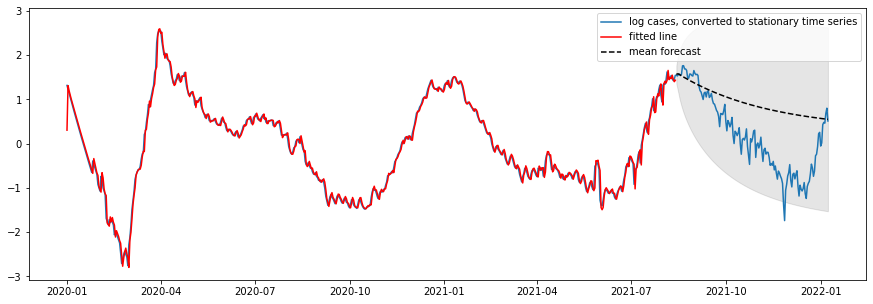

In [28]:
## Then, let's see how this does with the AR(1) and MA(3). 
arma = ARIMA(train_price, order=(1,0,3)).fit()
print(arma.summary())
fig, ax = plt.subplots(figsize=(15, 5))

# Construct the forecasts
fcast = arma.get_forecast(len(test_price)).summary_frame()

arma_predictions = arma.predict()
ax.plot(california.index.values, cubic_residuals, label='log cases, converted to stationary time series')
predicted_values = arma_predictions
ax.plot(train_date, predicted_values, 'r', label='fitted line')
forecast_means = fcast['mean'].values.reshape(-1,1)
test_set_mse = np.mean((forecast_means.reshape(test_price.shape) - test_price)**2)
ax.plot(test_date, forecast_means, 'k--', label='mean forecast')
ax.fill_between(test_date.flatten(), fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1);
plt.legend()
print("Test set mean squared error: ", test_set_mse)

The best predictor of the cases uses the AR(1) model and has coefficient of 0.9887. That is, the best predictor of COVID-19 cases is 0.9887 times today's COVID-19 acses (after taking the rolling average, log transformation, and removing the cubic trend). It turns out that ACF/PACF is more accurate than just doing a grid search over values.

In [29]:
# predicted_values - week_cubic_residuals
# forecast_means - week_test

predicted_labels = np.concatenate((predicted_values.reset_index().predicted_mean, forecast_means.flatten()), axis=None)
true_labels = cubic_residuals.reset_index().JHU_cases

week_arima_mse = mean_squared_error(true_labels, predicted_labels)
print(f"MSE of ARIMA model for weekly prediction: {week_arima_mse:.4f}")

MSE of ARIMA model for weekly prediction: 0.1949


## 9. Weekly Forecasting

### Extension: Weekly Predictions

If you're interested in long-range forecasts, it might be better to convert the time series to weekly values. 

This loses lots of rich variation, but avoids the problem where predictions one week away will have converged to the mean of the series. 

We follow the same steps: convert to stationary, model the AR/MA components, and then form predictions. 

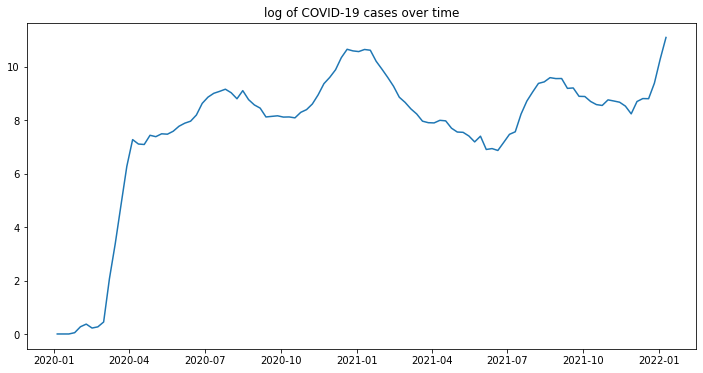

In [30]:
collapsed = log_cases.groupby(pd.Grouper(freq ='W')).mean()
week_date = collapsed.reset_index().date.dt.date.values.reshape(-1,1)
week_log_case = collapsed.reset_index().JHU_cases.values.reshape(-1,1)
fig, ax = plt.subplots(1,1, figsize = (12,6))
plt.plot(week_date, week_log_case)
plt.title("log of COVID-19 cases over time")
plt.show()

[[ 6.03914116e-01 -1.07353067e-02  5.75986373e-05]]


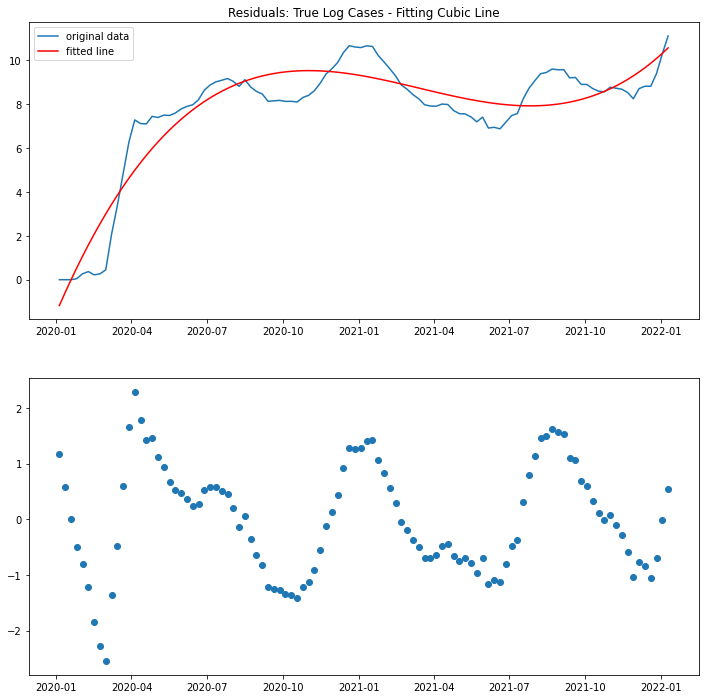

MSE with cubic fit: 0.9587963703481652


In [31]:
clf = linear_model.LinearRegression()
index = collapsed.reset_index().index.values.reshape(-1,1)
new_x = np.hstack((index, index **2, index **3))
clf.fit(new_x, week_log_case)
print(clf.coef_) # To print the coefficient estimate of the series. 
month_quad_prediction = clf.predict(new_x)

fig, axs = plt.subplots(2,1, figsize=(12,12))
axs[0].plot(week_date, week_log_case, label='original data')
axs[0].plot(week_date, month_quad_prediction, 'r', label='fitted line')
axs[0].legend()
axs[0].set_title("True Log Cases vs Fitting Cubic Line")

week_cubic_residuals = week_log_case - month_quad_prediction
axs[1].plot(week_date, week_cubic_residuals, 'o')
axs[0].set_title("Residuals: True Log Cases - Fitting Cubic Line")
plt.show();
print("MSE with cubic fit:", np.mean((week_cubic_residuals)**2))

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


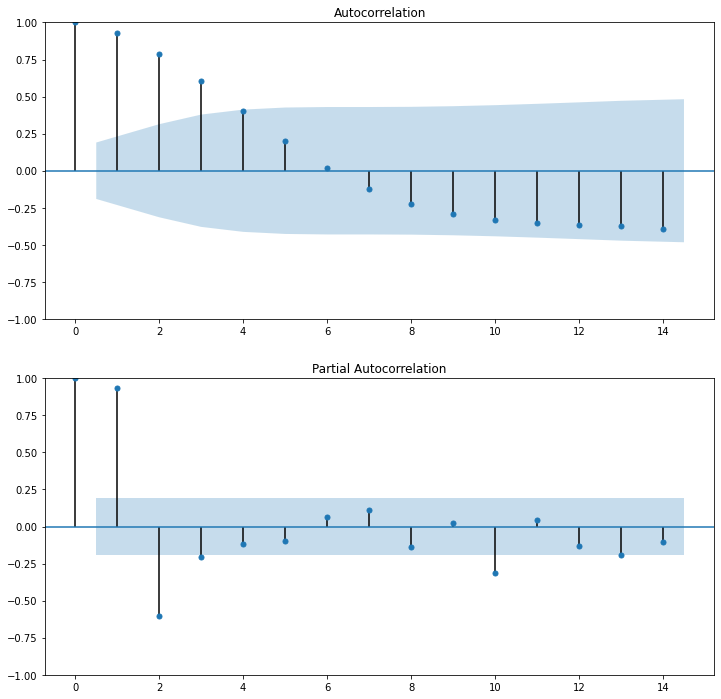

In [32]:
fig, axs = plt.subplots(2,1, figsize = (12,12))
sm.graphics.tsa.plot_acf(week_cubic_residuals, lags=14, ax = axs[0])
sm.graphics.tsa.plot_pacf(week_cubic_residuals, lags=14, ax = axs[1])
plt.show()

In [33]:
week_train_test = int(0.8 * len(week_date))
week_train, week_test = week_cubic_residuals[:week_train_test], week_cubic_residuals[week_train_test:]
week_date_train, week_date_test = week_date[:week_train_test], week_date[week_train_test:]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Minimizing AIC order:  (2, 0, 1)
Minimizing BIC order:  (2, 0, 1)
matrix of AIC [[300.35485347 185.65100517 116.01760485  80.42558629]
 [ 84.226699    51.18087919  40.16808387  35.84386527]
 [ 24.44400441  19.25152136  21.24784073  23.24307942]
 [ 20.43466682  21.24797197  19.28397092  21.44216753]]
Matrix of BIC [[305.68173166 193.64132245 126.67136123  93.74278176]
 [ 92.21701628  61.83463557  53.48527934  51.82449984]
 [ 35.09776079  32.56871683  37.2284753   41.88715308]
 [ 33.75186229  37.22860653  37.92804458  42.74968028]]
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  106
Model:                 ARIMA(2, 0, 1)   Log Likelihood                  -4.626
Date:                Sun, 28 Aug 2022   AIC                             19.252
Time:                        00:32:12   BIC                             32.569
Sample:                             0   HQIC                         

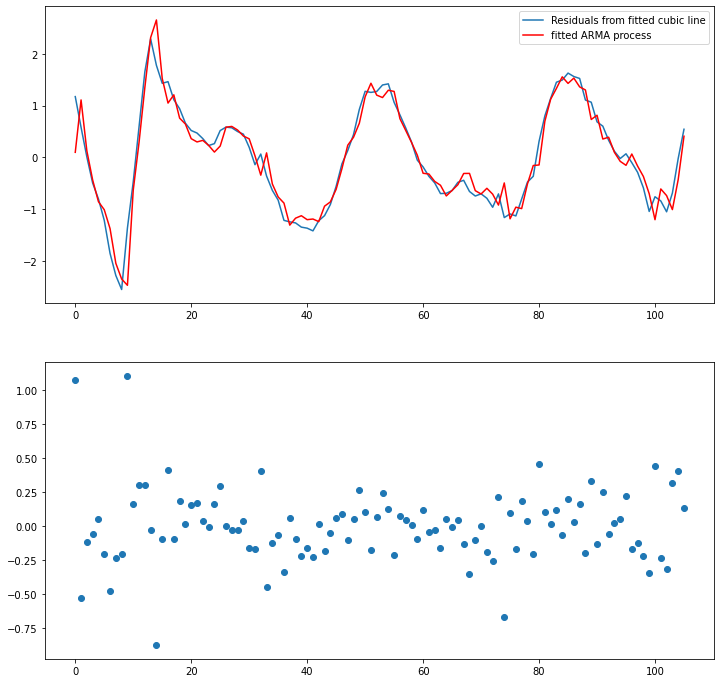

Automatic selection finds model with AR 2, MA 1
MSE with selected model: 0.07337165944319171


In [34]:
min_aic_index, min_bic_index, *other = grid_search_ARIMA(week_cubic_residuals, range(4), range(4), verbose=True)
if min_aic_index == min_bic_index:
  arma = ARIMA(week_cubic_residuals, order=min_bic_index).fit()
  print(arma.summary())
  arma_predictions = arma.predict()
  arma_residuals = week_cubic_residuals.reshape(arma_predictions.shape) - arma_predictions
  arma_residuals = arma_residuals # Fitting AR 1 model means removing one observation
  
  fig, axs = plt.subplots(2,1, figsize = (12,12))
  axs[0].plot(week_cubic_residuals, label='Residuals from fitted cubic line')
  axs[0].plot(arma_predictions, 'r', label='fitted ARMA process')
  axs[0].legend()
  axs[1].plot(arma_residuals, 'o')
  plt.show()
  print("Automatic selection finds model with AR {0}, MA {2}".format(*min_aic_index))
  print("MSE with selected model:", np.mean(arma_residuals**2))
else:
  print("AIC, BIC do not agree.")

Test set mean squared error:  0.4762984669587506


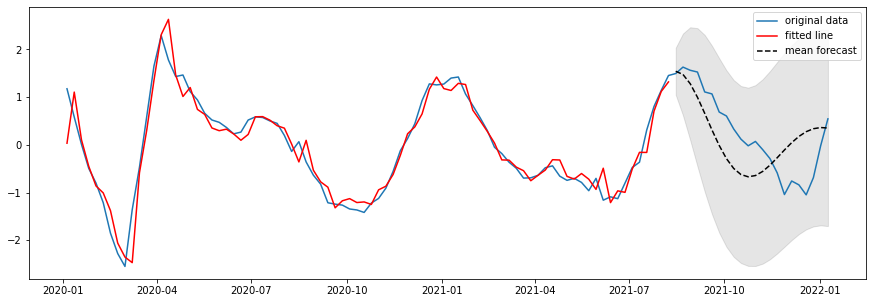

In [35]:
arma = ARIMA(week_train, order=min_bic_index).fit()
fig, ax = plt.subplots(figsize=(15, 5))

# Construct the forecasts
fcast = arma.get_forecast(len(week_test)).summary_frame()

arma_predictions = arma.predict()
ax.plot(week_date, week_cubic_residuals, label='original data')
predicted_values = arma_predictions.reshape(-1,1)
ax.plot(week_date_train, predicted_values, 'r', label='fitted line')
forecast_means = fcast['mean'].values.reshape(-1,1)
ax.plot(week_date_test, forecast_means, 'k--', label='mean forecast')
ax.fill_between(week_date_test.flatten(), fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1);
plt.legend();

test_set_mse = np.mean((forecast_means.reshape(week_test.shape) - week_test)**2)
print("Test set mean squared error: ", test_set_mse)

In [36]:
# predicted_values - week_cubic_residuals
# forecast_means - week_test
predicted_labels = np.concatenate((predicted_values.flatten(), forecast_means.flatten()), axis=None)
true_labels = week_cubic_residuals.flatten()

week_arima_mse = mean_squared_error(true_labels, predicted_labels)
print(f"MSE of ARIMA model for weekly prediction: {week_arima_mse:.4f}")


MSE of ARIMA model for weekly prediction: 0.1621
